# LetsGrowMore Virtual Internship Program ( May 2022)
Author : Bhagyashri Pagar

Task 1 (Intermidiate level) : Exploratory Data Analysis on Dataset - Terrorism 

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Jupyter Notebook will ignore all the warnings
import warnings
warnings.filterwarnings('ignore')    

# Loading the Dataset

In [12]:
terror_data = pd.read_csv(r"C:\Users\Chakuli\Documents\ML python\Global Terrorism - START data\globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

In [13]:
# Looking at first 5 rows of the dataset
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [14]:
# Looking at last 5 rows of the dataset
terror_data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


# Getting the Size of the Dataset

In [18]:
print(terror_data.shape)

(181691, 135)



# All the column names of the dataset

In [19]:
columns = terror_data.columns.tolist()
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [20]:
#Renaming Certain Columns
df = pd.DataFrame(terror_data, terror_data.rename(columns={ 'success': 'Success', 'location': 'Location', 'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'country': 'Country_code', 'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True))

In [21]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,Country_code,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Feature Creation

In [22]:
#Here, a new column is added called Total_casualities which represents number of the people harmed (killed + injured) in terrorist attacks.

df['Total_casualities'] = df['Killed'] + df['Wounded']

# Feature Extraction

In [52]:
#In these section, we extract some of the columns from the dataset and analyze these data to get some useful informaton.

df =  df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude','Location','AttackType','Killed','Wounded','Total_casualities']]

In [53]:
col = df.columns.tolist()
print(col)

['Year', 'Month', 'Extended', 'Day', 'Country', 'State', 'Region', 'City', 'Latitude', 'Longitude', 'Location', 'AttackType', 'Killed', 'Wounded', 'Total_casualities']


In [26]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,Country_code,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Total_casualities
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN


# Checking for Null Values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 136 entries, eventid to Total_casualities
dtypes: float64(56), int64(22), object(58)
memory usage: 188.5+ MB


In [28]:
df.isnull().sum()

eventid                   0
Year                      0
Month                     0
Day                       0
approxdate           172452
                      ...  
INT_IDEO                  0
INT_MISC                  0
INT_ANY                   0
related              156653
Total_casualities     16874
Length: 136, dtype: int64

# Exploratory Data Analysis and Data Visualization

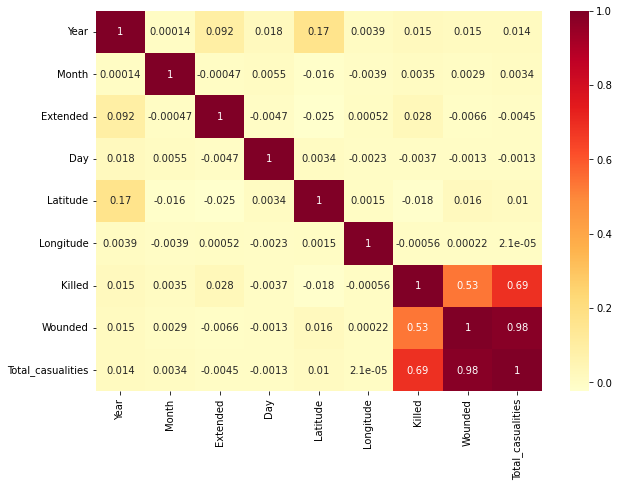

In [56]:
#Correlation Heatmap for the features
corr  =  df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot =  True, cmap = 'YlOrRd')
plt.show()

# DATA VISUALISATION

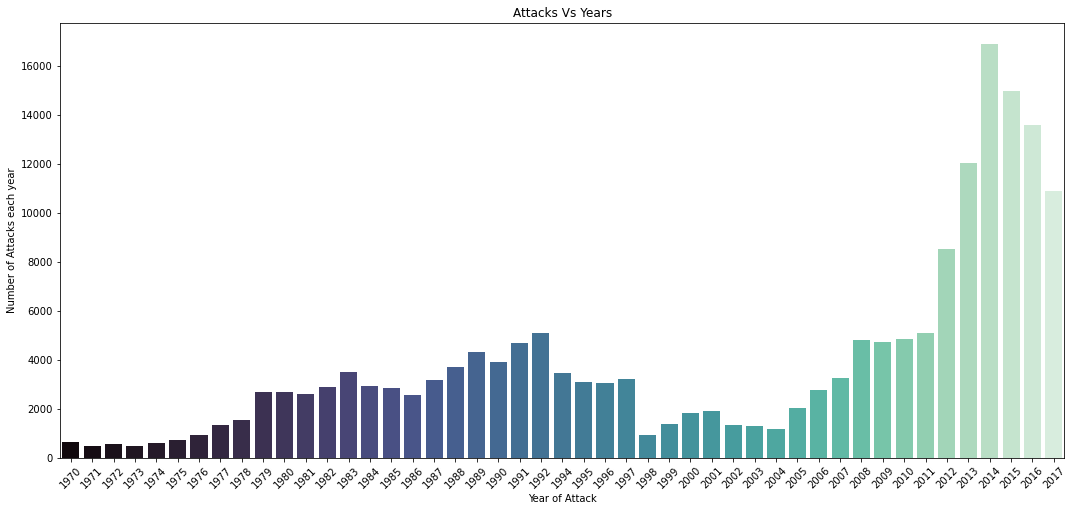

In [55]:
#Number of attacks each year from 1970 to 2017
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,8))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'mako')
plt.xticks(rotation = 45)
plt.xlabel('Year of Attack')
plt.ylabel('Number of Attacks each year')
plt.title('Attacks Vs Years')
plt.show()

# Number of Terrorists Activities per Year

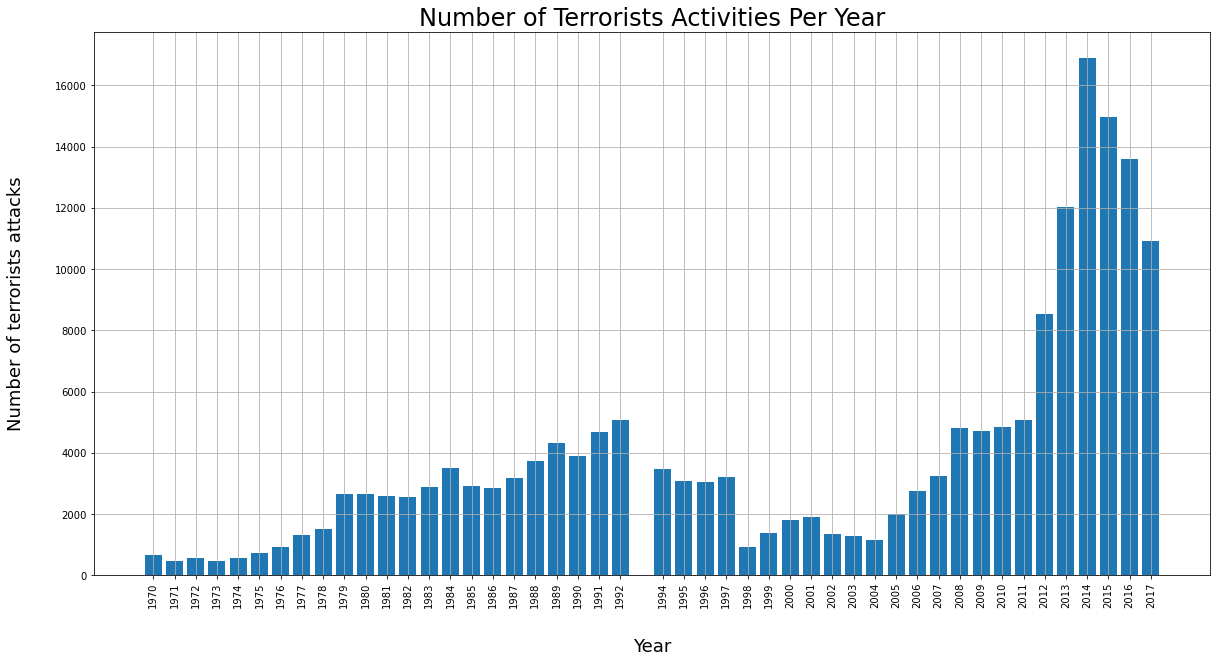

In [49]:
#Let's see the visualization between Number of terrorists activities and Year

count =  df['Year'].value_counts()
year = count.index.sort_values(ascending  = True)
val = []
for i in year:
    val.append(count[i])
plt.figure(figsize = (20,10))
plt.bar(year, val, tick_label = year)
plt.xticks(rotation  = 90)
plt.title('Number of Terrorists Activities Per Year', fontsize=24)  
plt.xlabel('Year', fontsize = 18, labelpad = 30)
plt.ylabel('Number of terrorists attacks', fontsize = 18, labelpad = 30)
plt.grid(True)
plt.show()

# Total Casualties Per Year

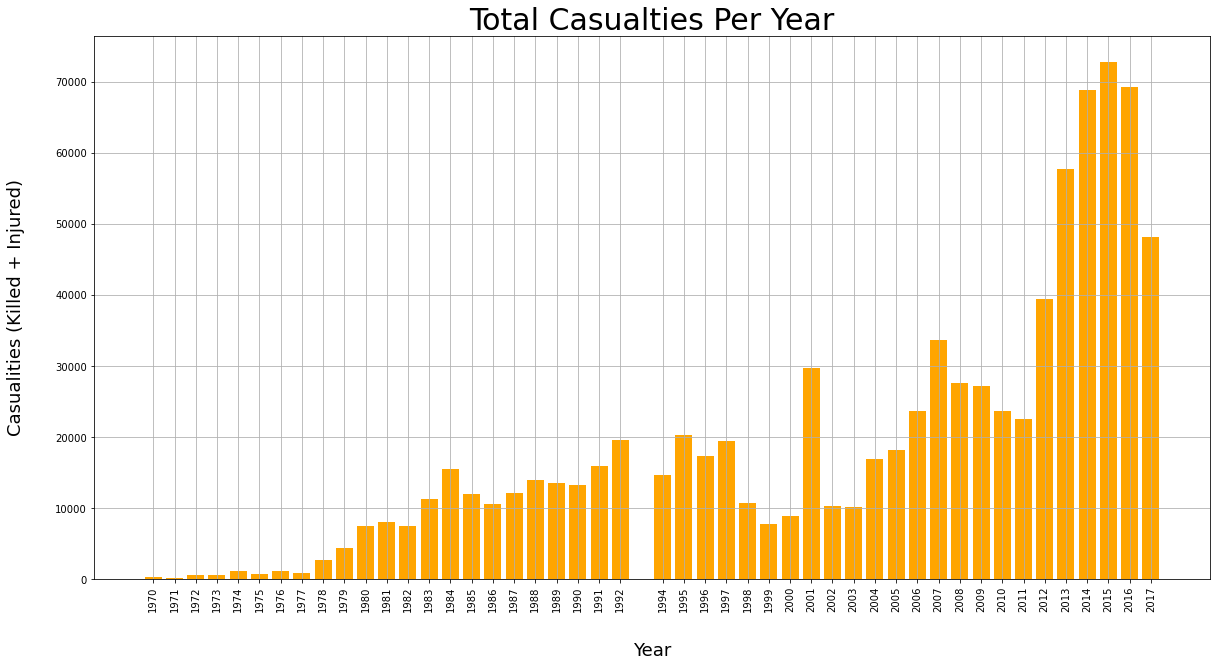

In [31]:
Cas_Year  = df.groupby(by = df['Year']).Total_casualities.sum().to_frame().reset_index()
plt.figure(figsize = (20,10))
plt.bar(Cas_Year['Year'], Cas_Year['Total_casualities'], tick_label = Cas_Year['Year'], color =  'orange')
plt.xticks(rotation  = 90)
plt.title('Total Casualties Per Year', fontsize=30)  
plt.grid(True)
plt.xlabel('Year', fontsize = 18, labelpad = 30)
plt.ylabel('Casualities (Killed + Injured)', fontsize = 18, labelpad = 30)
plt.show()


# Countries affected by Terrorist Attacks

In [32]:
country = df['Country'].value_counts().index.tolist()
print("Number of Countries affected by Terrorist Attacks :", len(country))

Number of Countries affected by Terrorist Attacks : 205


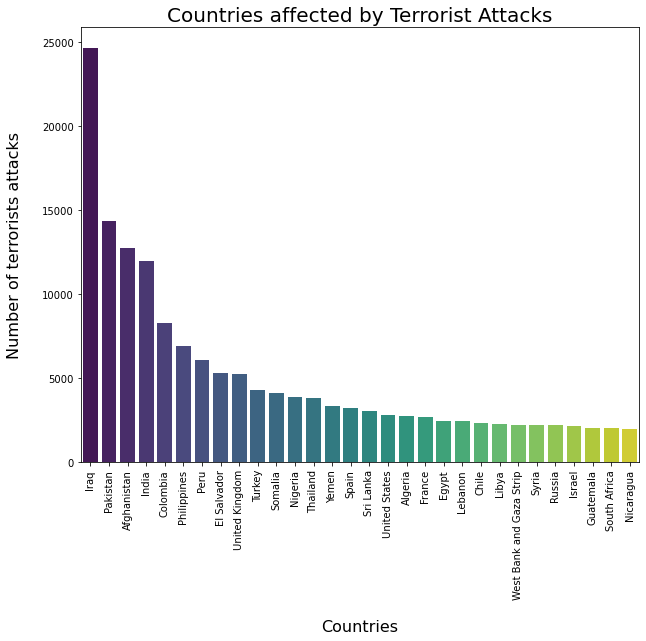

In [33]:
#Let's see, Top 30 Countries that are affected by Terrorist Attacks

fig = plt.figure(figsize=(10,8))
sns.barplot(df['Country'].value_counts()[0:30].index, df['Country'].value_counts()[0:30].values,palette='viridis',  tick_label = country[0:30])
plt.xticks(rotation = 90)
plt.title('Countries affected by Terrorist Attacks', fontsize =  20)
plt.xlabel('Countries', fontsize = 16, labelpad = 20)
plt.ylabel('Number of terrorists attacks', fontsize = 16, labelpad = 20)
plt.show()


# Number of Total Casualities in Each Country

In [34]:
count_cas = df.groupby('Country').Total_casualities.sum().to_frame().reset_index().sort_values('Total_casualities', ascending=False)
count_cas.head(30)

,Country,Total_casualities
84,Iraq,202982.0
0,Afghanistan,80213.0
134,Pakistan,64427.0
80,India,47108.0
167,Sri Lanka,29792.0
189,United States,24469.0
35,Colombia,23767.0
140,Philippines,22361.0
130,Nigeria,21728.0
175,Syria,21614.0


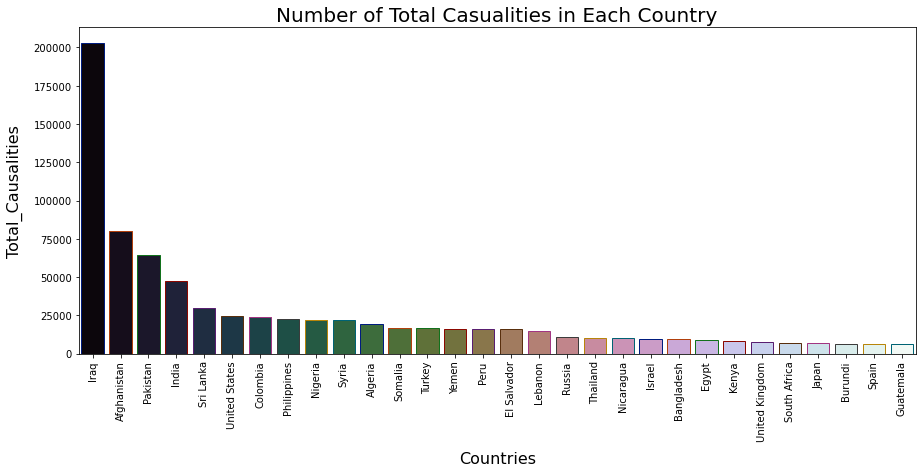

In [35]:
#Let's see, Top 30 Countries in terms of Causalities

plt.subplots(figsize=(15,6))
sns.barplot(x=count_cas.Country[0:30], y=count_cas.Total_casualities[0:30], palette= 'cubehelix',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Casualities in Each Country', fontsize  = 20)
plt.xlabel("Countries", fontsize = 16, labelpad = 10)
plt.ylabel("Total_Causalities", fontsize = 16, labelpad = 10)
plt.show()

# Most Affected States by Terrorist Attacks

In [36]:
state_aff = df['State'].value_counts()
print("Number of States affected by Terrorist Attacks :", len(state_aff))

Number of States affected by Terrorist Attacks : 2855


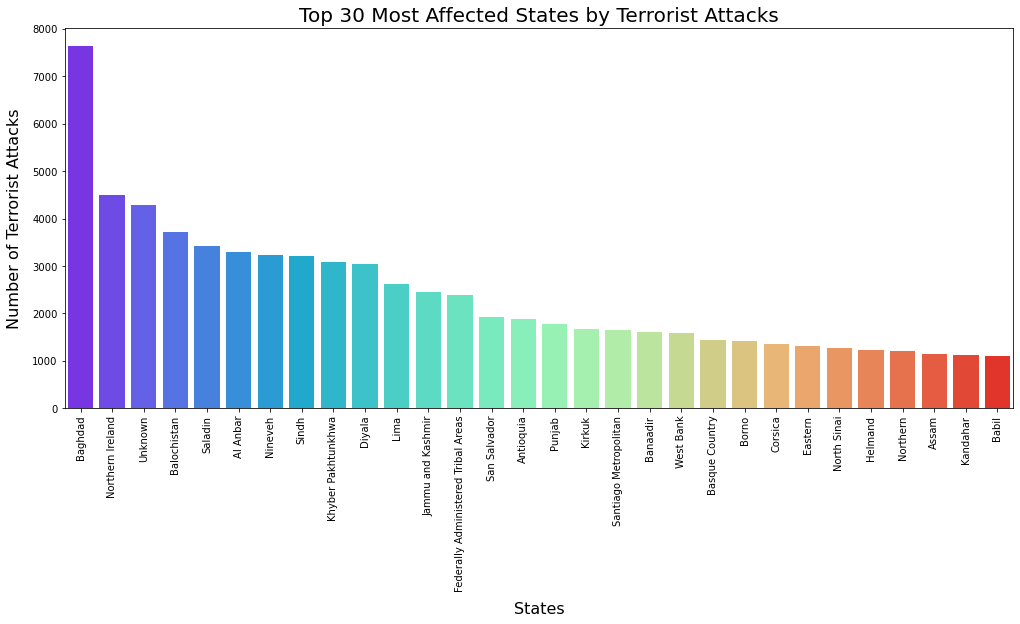

In [47]:
#Let's see, Top 30 states affected by the Terrorist Attacks.

fig = plt.figure(figsize=(17,7))
sns.barplot(state_aff[0:30].index, state_aff[0:30].values, palette='rainbow')
plt.title('Top 30 Most Affected States by Terrorist Attacks', fontsize =  20)
plt.xlabel('States', fontsize = 16, labelpad = 10)
plt.ylabel('Number of Terrorist Attacks', fontsize = 16, labelpad = 10)
plt.xticks(rotation=90)
plt.show()


# Most Affected Regions by Terrorist Attacks

In [38]:
region_aff = df['Region'].value_counts()
print("Number of Regions affected by the Terrorist Attacks :", len(region_aff))

Number of Regions affected by the Terrorist Attacks : 12


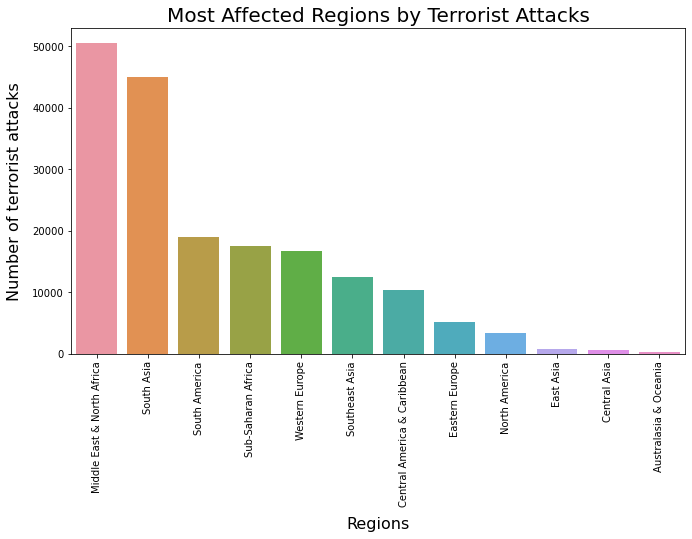

In [39]:
#Lets see, Top 30 Regions affected by the Terrorist Attacks

fig = plt.figure(figsize=(11,6))
sns.barplot(region_aff.index, region_aff.values, tick_label = region_aff.index)
plt.title('Most Affected Regions by Terrorist Attacks', fontsize =20)
plt.xlabel('Regions', fontsize = 16, labelpad = 10)
plt.ylabel('Number of terrorist attacks', fontsize = 16, labelpad = 10)
plt.xticks(rotation=90)
plt.show()

# Number of Terrorist Attacks v/s Terrorist Groups

In [40]:
terror_grps = df['Group'].value_counts()
print("Number of Terrorist groups that attacks :", len(terror_grps))

Number of Terrorist groups that attacks : 3537


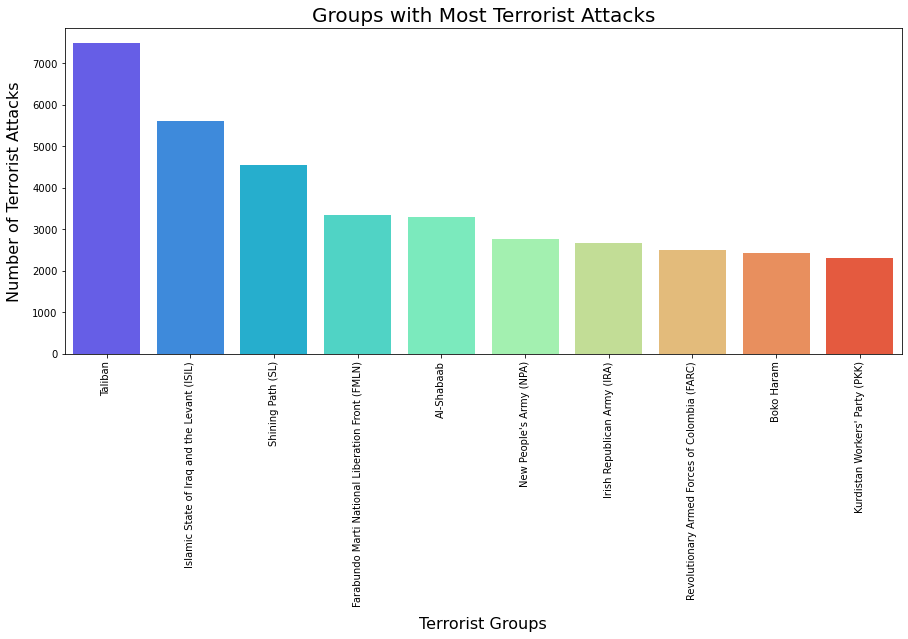

In [41]:
#Let's see, Top 10 Terrorist groups with most number of Attacks

fig = plt.figure(figsize=(15,6))
sns.barplot(terror_grps[1:11].index, terror_grps[1:11].values, palette='rainbow')
plt.title('Groups with Most Terrorist Attacks', fontsize  = 20)
plt.xlabel('Terrorist Groups', fontsize = 16, labelpad = 10)
plt.ylabel('Number of Terrorist Attacks', fontsize = 16, labelpad = 10)
plt.xticks(rotation=90)
plt.show()

# Types of Attacks executed by Terrorists

In [42]:
attack_types = df['AttackType'].value_counts()
print("Number of types of attacks executed by Terrorists :", len(attack_types))

Number of types of attacks executed by Terrorists : 9


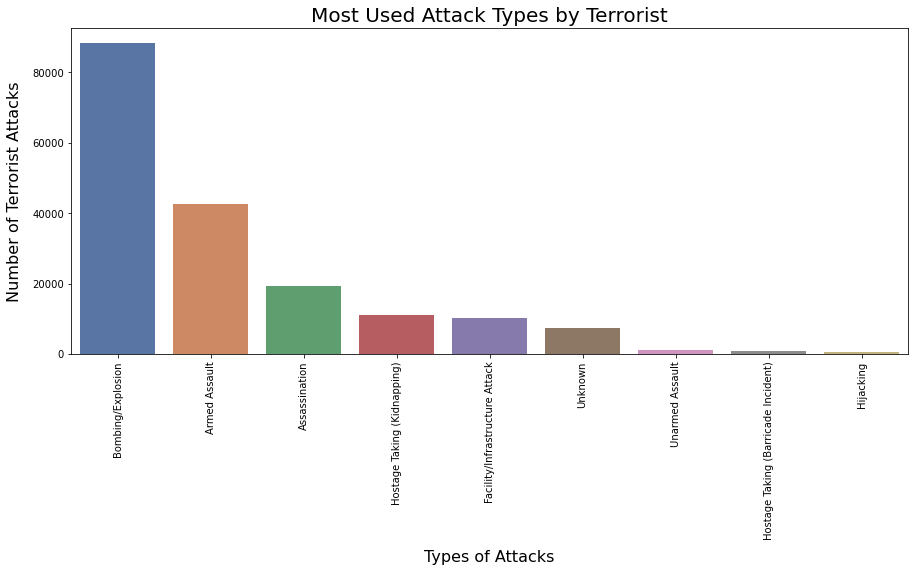

In [43]:
fig = plt.figure(figsize=(15,6))
sns.barplot(attack_types.index, attack_types.values, palette='deep')
plt.xticks(rotation=90)
plt.title("Most Used Attack Types by Terrorist", fontsize  = 20)
plt.xlabel("Types of Attacks", fontsize = 16, labelpad = 10)
plt.ylabel("Number of Terrorist Attacks", fontsize = 16, labelpad = 10)
plt.show()

# Most frequent targets of terrorists

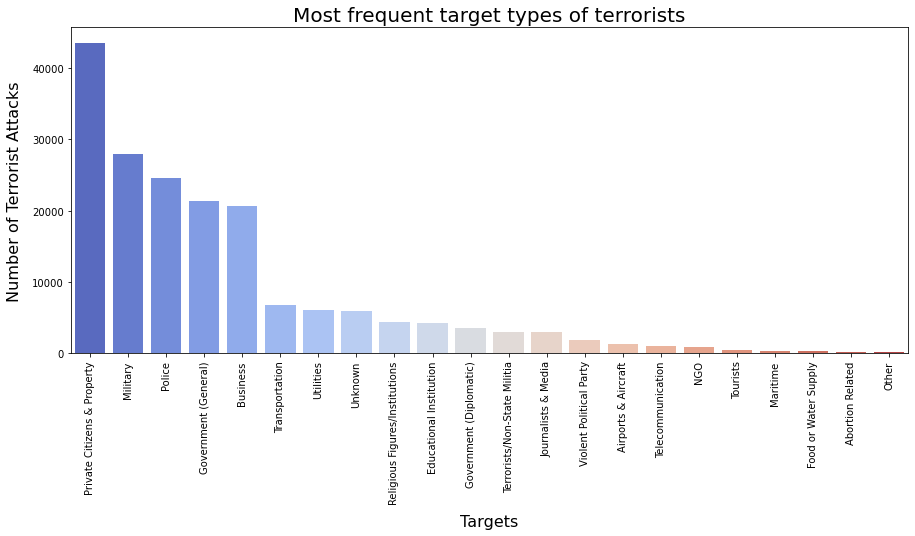

In [44]:
fig = plt.figure(figsize=(15,6))
sns.countplot('Target_type', data=df, order = df['Target_type'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Most frequent target types of terrorists", fontsize =  20)
plt.xlabel("Targets", fontsize = 16, labelpad =  10)
plt.ylabel("Number of Terrorist Attacks", fontsize = 16, labelpad = 10)
plt.show()

# Final Conclusion

In [ ]:
The most affected region by terrorist attacks is Middle East and North Africa with 50K+ Terrorist Attacks.
The country which is most affected by terrorist attacks is Iraq.
Terrorist mostly uses Bombing/Explosion to attack
Terrorist mostly uses Explosives as a weapon
Iraq, Pakistan, Afghanistan, India, Colombia these are top 5 with most Terrorist attack
Similarly above 5 countries are the most targeted countries
Terrorist killed people mainly with Armed Assault and Bombing/Explosion
People killed in Iraq and Afgahanistan Terrorist Attack are very high compare to other count
The most affected Country by Total Casualities is Iraq with 200K+ Casualities.
The most affected State by Terrorist Attacks is Baghdadm with 7500+ Terrorist Attacks.
The Terrorist Group with Most No. of Terrorist Attacks is Taliban with 7K+ Terrorist Attacks.
The Most Used Attack Type by Terrorists is Bombing/Explosion.
The Most frequent target type of terrorists is Private Citizens & Property.
